# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [31]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders

import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from standardiser import standardise

# Specify the path to the data folder
data_path = os.path.join('..', 'data')

# Specify the path to the drug molecules file
data_path = os.path.join(data_path, 'input.csv')

In [32]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
df = pd.read_csv(data_path, sep="\t")
headers = df.columns
print(headers)

Index(['Smiles'], dtype='object')


In [33]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here
import sys
sys.path.append('../src')

from smiles_processing import standardise_smiles
# Extract the 'Smiles' column and convert it to a list
molecules = df['Smiles'].tolist()
# Standardize the SMILES using the standardise_smile¥ys function
df['Smiles'] = standardise_smiles(molecules)


[14:26:36] Can't kekulize mol.  Unkekulized atoms: 3 7


In [58]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package
import sys
sys.path.append('../src')
from get_inchi_keys import get_inchikey
molecules = df['Smiles'].tolist()
df['Inchi Key'] = get_inchikey(molecules)


In [59]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
df_subset = df[['Smiles', 'Inchi Key']].copy()
df_subset = df_subset.dropna()

# data will be saved with informative names in the /data folder
output_file = '../data/output.csv'  # Specify the desired output file name

df_subset.to_csv(output_file, index=False)

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [60]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

predictions_path = os.path.join('..', 'data', 'prediction.csv')

# Load the predictions into a Pandas DataFrame
df_predictions = pd.read_csv(predictions_path)


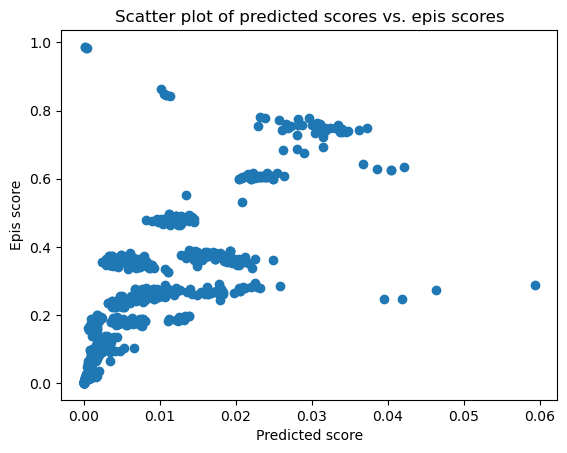

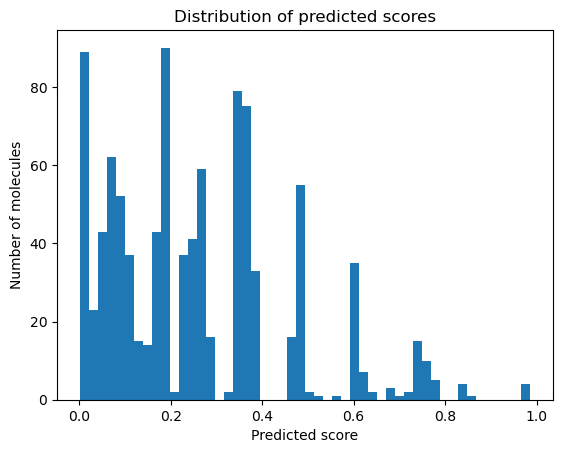

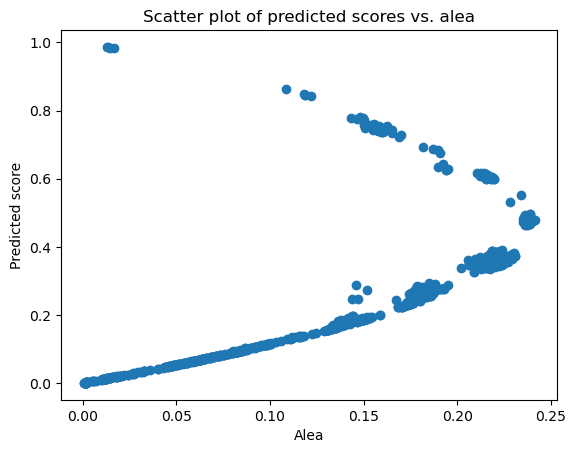

In [61]:
#In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

import matplotlib.pyplot as plt

# scatter plot of the predicted scores vs. the epis column
plt.scatter(df_predictions['epis'], df_predictions['score'])
plt.xlabel('Predicted score')
plt.ylabel('Epis score')
plt.title('Scatter plot of predicted scores vs. epis scores')
plt.show()


# histogram of the predicted scores
plt.hist(df_predictions['score'], bins=50)
plt.xlabel('Predicted score')
plt.ylabel('Number of molecules')
plt.title('Distribution of predicted scores')
plt.show()


# scatter plot of the predicted scores vs. the alea values
plt.scatter(df_predictions['alea'], df_predictions['score'])
plt.xlabel('Alea')
plt.ylabel('Predicted score')
plt.title('Scatter plot of predicted scores vs. alea')
plt.show()